In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [84]:
# load csv
df_municipis = pd.read_csv('data/poblacio_municipis.csv')

In [85]:
def get_dades_poblacio(any):
    decimal_places = 1
    df_municipis['Latitud_round'] = df_municipis.Latitud.apply(lambda x: round(float(x), decimal_places))
    df_municipis['Longitud_round'] = df_municipis.Longitud.apply(lambda x: round(float(x), decimal_places))
    column_string = 'Poblacio_' + str(any)
    df_municipis['Poblacio'] = df_municipis[column_string].apply(lambda x: float(str(x).replace('.', '')))

    latitud_poblacio = df_municipis.groupby('Latitud_round')['Poblacio'].sum()
    max_latitud_poblacio = np.max(latitud_poblacio.values)
    latitud_poblacio_percentatge = latitud_poblacio.apply(lambda x: x / max_latitud_poblacio * 100)
    longitud_poblacio = df_municipis.groupby('Longitud_round')['Poblacio'].sum()
    max_longitud_poblacio = np.max(longitud_poblacio.values)
    longitud_poblacio_percentatge = longitud_poblacio.apply(lambda x: x / max_longitud_poblacio * 100)
    return latitud_poblacio.index.values, latitud_poblacio_percentatge.values, longitud_poblacio.index.values, longitud_poblacio_percentatge.values

In [7]:
# load img
img = plt.imread('img/map_catalonia.png')

2003


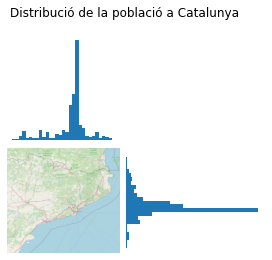

2004


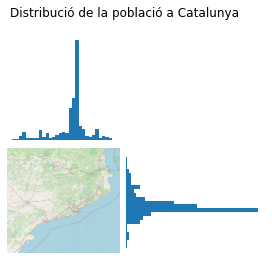

2005


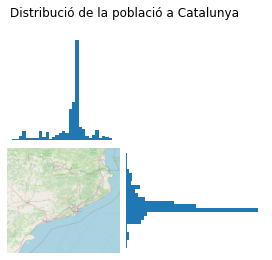

2006


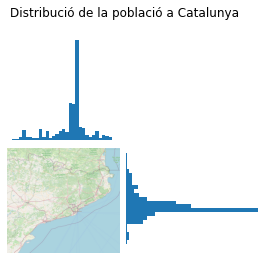

2007


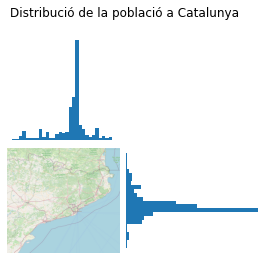

2008


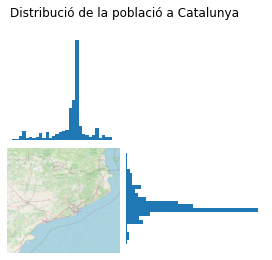

2009


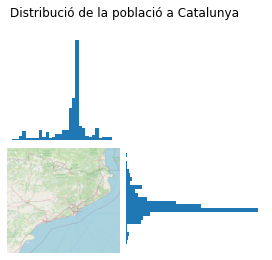

2010


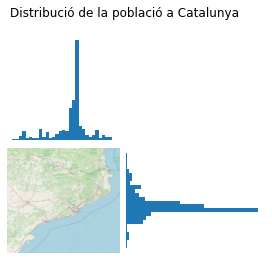

2011


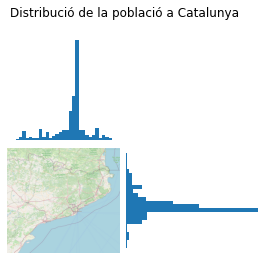

2012


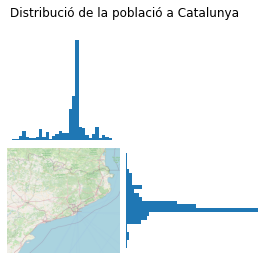

2013


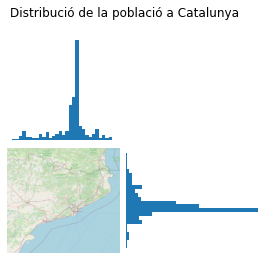

2014


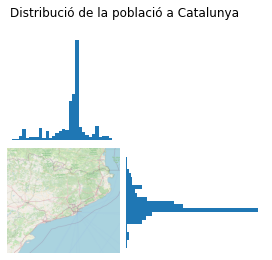

2015


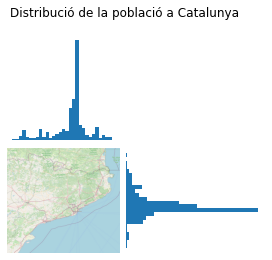

2016


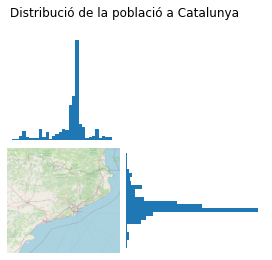

2017


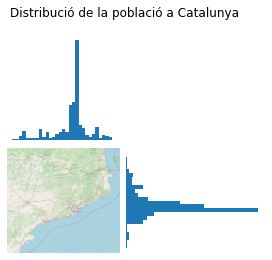

2018


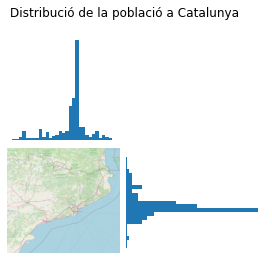

2019


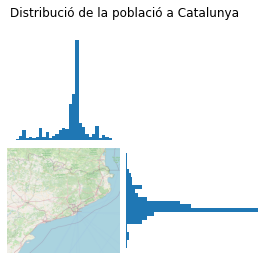

2020


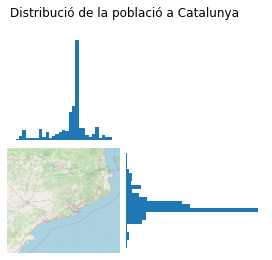

2021


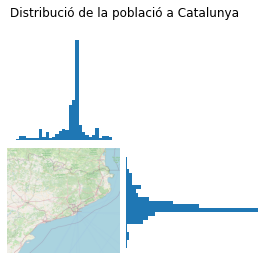

In [86]:
for any in range(2003, 2022):
    print(any)
    valors_latitud, poblacio_latitud, valors_longitud, poblacio_longitud = get_dades_poblacio(any)
    fig = plt.figure()

    gs = fig.add_gridspec(2, 2, hspace=0.08, wspace=-0.35)
    (ax1, ax2), (ax3, ax4) = gs.subplots()
    fig.suptitle('Distribució de la població a Catalunya')
    ax1.bar(valors_longitud, poblacio_longitud, width=0.1)
    ax2.plot(1, 42)
    # plot image
    ax3.imshow(img, extent=[0, 3.5, 40.3, 43])
    ax4.barh(valors_latitud, poblacio_latitud, height=0.1)
    ax1.set_aspect(0.03)
    ax1.axis('off')
    ax2.set_aspect(1.2)
    ax2.axis('off')
    ax3.set_aspect(1.2)
    ax3.axis('off')
    ax4.set_aspect(30)
    ax4.axis('off')
    plt.show()
